In [242]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [243]:
df=pd.read_csv('height_weight_data.csv')
df.head()

,Height,Weight
0,173,86.68
1,169,79.64
2,182,92.27
3,167,87.98
4,178,92.61


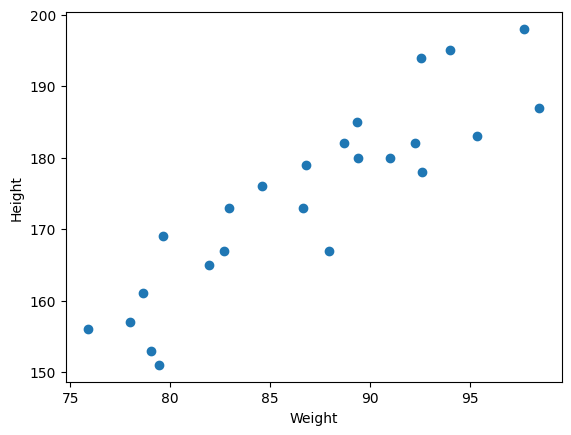

In [244]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

In [245]:
df.corr()

,Height,Weight
Height,1.000000,0.896435
Weight,0.896435,1.000000


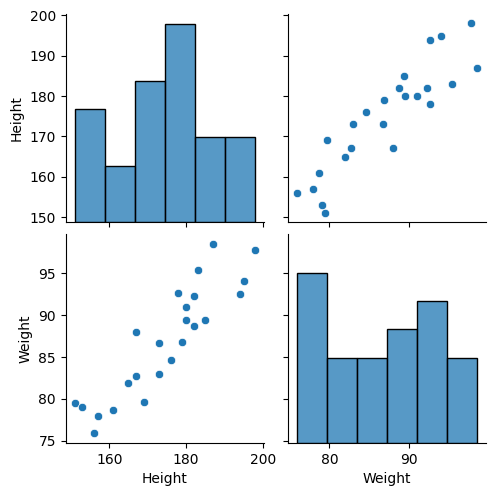

In [246]:
import seaborn as sns

sns.pairplot(df)

In [247]:
#Independent feature and dependent feature

X=df[['Weight']] #Independent feature should be in dataframe
y=df['Height'] #Target should be series in LR


np.float64(86.91208333333334)

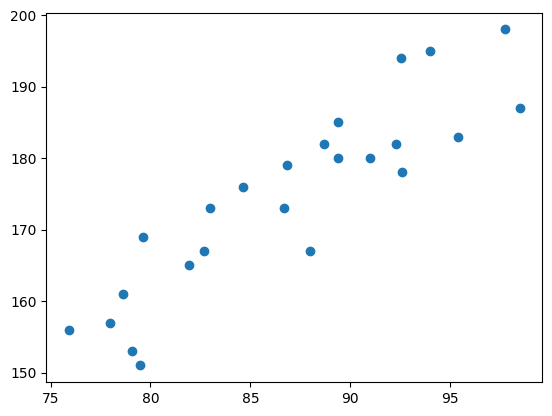

In [248]:
plt.scatter(df['Weight'],df['Height'])
df['Weight'].mean()

In [249]:
from sklearn.model_selection import train_test_split

In [250]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [251]:
## Strandardization
from sklearn.preprocessing import StandardScaler

In [252]:
scalar=StandardScaler()
X_train=scalar.fit_transform(X_train)
X_test=scalar.transform(X_test)



In [253]:
X_train

array([[-0.47243796],
       [-1.19759787],
       [ 1.43802349],
       [ 0.22505521],
       [ 0.64151251],
       [-1.74073973],
       [ 0.68228455],
       [ 0.01682656],
       [ 0.69102141],
       [ 0.89196934],
       [-1.43931784],
       [ 0.21923063],
       [-1.34321231],
       [-1.22380847],
       [ 0.1231251 ],
       [ 1.54577818],
       [-0.15063005],
       [ 1.09291727]])

In [254]:
##Apply Simple Linear Regression
from sklearn.linear_model import LinearRegression

In [255]:
regression=LinearRegression()

In [ ]:
regression.fit_(X_train,y_train)

LinearRegression()

In [257]:
print("Coefficient is :: ",regression.coef_)
print("Intercept  is :: ",regression.intercept_)

Coefficient is ::  [11.94707156]
Intercept  is ::  176.66666666666666


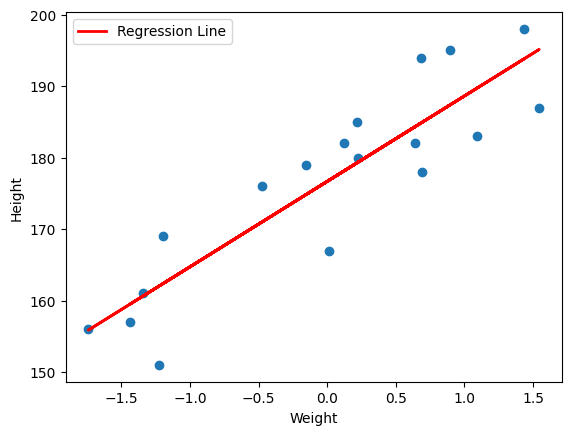

In [258]:
##plot the training data and best bit line
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train),color='red', linewidth=2, label="Regression Line")

plt.xlabel("Weight")
plt.ylabel("Height")
plt.legend()
plt.show()


### Prediction of test data

##### 1.predicted output is intercept+coeff(weight) 
##### 2.y_pred=176.67 + 11.94707156(X_test)

In [259]:
##Prediction for test data
y_pred=regression.predict(X_test)


In [260]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

17.16814626933189
3.161314921728002
4.1434461827483515


In [ ]:
## R squared 

from sklearn.metrics import r2_score

score =r2_score(y_test,y_pred)
print(score)


0.759043561132184

In [262]:
## Adjusted R squared

1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.69880445141523

In [263]:
## OLS method in linear regression

import statsmodels.api as sm

In [264]:
model=sm.OLS(y_train,X_train).fit()

In [265]:
predict=model.predict(X_test)
predict

array([ -8.53209591,  -9.00180577,  -2.06053789, -10.32395203,
       -15.29939718,   5.45481981])

In [266]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.005
Model:                            OLS   Adj. R-squared (uncentered):             -0.054
Method:                 Least Squares   F-statistic:                            0.07765
Date:                Sat, 15 Feb 2025   Prob (F-statistic):                       0.784
Time:                        09:52:42   Log-Likelihood:                         -118.69
No. Observations:                  18   AIC:                                      239.4
Df Residuals:                      17   BIC:                                      240.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

c:\Users\Rupesh\Documents\PYTHON\myvenv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [268]:
## prediction for new data
regression.predict(scalar.transform([[91],[7.8]]))

c:\Users\Rupesh\Documents\PYTHON\myvenv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([182.12148648,  37.38126405])